In [26]:
import os
import zipfile
os.chdir('/home/aistudio/data/data269')
extracting = zipfile.ZipFile('房价预测.zip')
extracting.extractall()


In [27]:
class Model_Config(object):
    def __init__(self, firstnetnum, secondnetnum):
        np.random.seed(1)
        self.w0 = np.random.randn(firstnetnum * secondnetnum, 1).reshape(firstnetnum, secondnetnum)
        self.w1 = np.random.randn(secondnetnum, 1)
        self.b0 = np.random.randn(firstnetnum, 1).reshape(1, firstnetnum)
        self.b1 = np.random.randn(1, 1)

    # 计算预测值，前向传播过程
    def forward(self, x):
        hidden1 = np.dot(x, self.w0) + self.b0  # 由输入层到隐藏层
        y = np.dot(hidden1, self.w1) + self.b1  # 由隐藏层到输出层
        return hidden1, y

    # 设置损失函数,这里使用差平方损失函数计算方式
    def loss(self, z, y):
        error = z - y
        cost = error * error
        avg_cost = np.mean(cost)
        return avg_cost

    # 计算梯度
    def back(self, x, y):
        hidden1, z = self.forward(x)
        # hidden层的梯度
        gradient_w1 = (z - y) * hidden1
        gradient_w1 = np.mean(gradient_w1, axis=0)  # 这里注意，axis=0必须写上，否则默认将这个数组变成一维的求平均
        gradient_w1 = gradient_w1[:, np.newaxis]  #
        gradient_b1 = (z - y)
        gradient_b1 = np.mean(gradient_b1)
        gradient_w0 = np.zeros(shape=(1, 1))
        for i in range(len(x)):
            data = x[i, :]
            data = data[:, np.newaxis]
            # print("data.shape",data.shape)
            w1 = self.w1.reshape(1, 1)
            # print("self.w1.shape",w1.shape)
            gradient_w01 = (z - y)[i] * np.dot(data, w1)
            # print("gradient_w01.shape:",gradient_w01.shape)
            gradient_w0 += gradient_w01
        gradient_w0 = gradient_w0 / len(x)
        w2 = self.w1.reshape(1, 1)
        gradient_b0 = np.mean((z - y) * w2, axis=0)

        return gradient_w1, gradient_b1, gradient_w0, gradient_b0

    # 使用梯度更新权值参数w1，b1,w0,b0
    def update(self, gradient_w1, gradient_b1, gradient_w0, gradient_b0, learning_rate):
        self.w1 = self.w1 - learning_rate * gradient_w1
        self.b1 = self.b1 - learning_rate * gradient_b1
        self.w0 = self.w0 - learning_rate * gradient_w0
        self.b0 = self.b0 - learning_rate * gradient_b0

    # 开始训练
    def train(self, epoch_num, x, y, learning_rate):
        # 循环迭代
        losses = []
        for i in range(epoch_num):
            _, z = self.forward(x)  # 前向传播
            avg_loss = self.loss(z, y)  # 损失函数
            gradient_w1, gradient_b1, gradient_w0, gradient_b0 = self.back(x, y)  # 计算梯度
            self.update(gradient_w1, gradient_b1, gradient_w0, gradient_b0, learning_rate)  # 更新梯度
            losses.append(avg_loss)  # 记录迭代过程中损失函数值
            # 每进行20此迭代，显示一下当前的损失值
            if (i % 20 == 0):
                print("iter:{},loss:{}".format(i, avg_loss))
        
        return losses, self.w1, self.b1, self.w0, self.b0
def deal_data():
    # 读取文件数据，此时数据形状是(870,2)
    
    df =  pd.read_csv("./房价预测/data/data.txt",sep=',')  # 用pandas读取数据，分隔符为逗号
    housingdata = np.array(df)  # 将DF数据类型转化为numpy数据类型

    # 规范数据格式。
    housingdata = np.array(housingdata).reshape((-1, 2))  # 此时数据形状为(870,2)

    # 对数据的第一个属性进行归一化操作，有助于提高模型精准度，这里使用max-min归一化方式。公式为(x-min)/(max-min)
    for i in range(1):
        Max = np.max(housingdata[:, i])
        Min = np.min(housingdata[:, i])
        housingdata[:, i] = (housingdata[:, i] - Min) / (Max - Min)

    # 依据2-8原则，80%的数据作为训练数据，20%数据作为测试数据；
    Splitdata = round(len(housingdata) * 0.8)
    Train = housingdata[:Splitdata]  # 训练数据集
    Test = housingdata[Splitdata:]  # 测试数据集
    return Train, Test

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [29]:
# 画出损失函数随迭代次数增加的情况
def showpeocess(loss, epoch_num):
    plt.title("The Process Of Train")
    plt.plot([i for i in range(epoch_num)], loss)
    plt.xlabel("epoch_num")
    plt.ylabel("loss")
    plt.show()

# 画出测试集标签随迭代次数增加的情况
def shower_true(true, epoch_num):
    plt.title("true")
    plt.plot([i for i in range(epoch_num)], true)
    plt.xlabel("epoch_num")
    plt.ylabel("value")
    plt.show()

# 画出预测值随迭代次数增加的情况
def shower_predict(predict, epoch_num):
    plt.title("predict")
    plt.plot([i for i in range(epoch_num)], predict)
    plt.xlabel("epoch_num")
    plt.ylabel("value")
    plt.show()

# 画出预测值和真实值的对比
def shower(true, predict, epoch_num):
    plt.plot([i for i in range(epoch_num)], true)
    plt.plot([i for i in range(epoch_num)], predict)
    plt.xlabel("num")
    plt.ylabel("value")
    plt.show()


iter:0,loss:448783.92739766295
iter:20,loss:446260.2054846042
iter:40,loss:433917.44741002354
iter:60,loss:326449.4351836639
iter:80,loss:87681.36909037248
iter:100,loss:59204.20023157632
iter:120,loss:56091.0254650378
iter:140,loss:53347.11301059519
iter:160,loss:50772.50341327851
iter:180,loss:48347.405362174024
iter:200,loss:46058.88309370478
iter:220,loss:43898.83053350852
iter:240,loss:41862.88898192056
iter:260,loss:39949.51734393493
iter:280,loss:38159.140469580285
iter:300,loss:36493.34190676973
iter:320,loss:34954.09770779241
iter:340,loss:33543.07130577572
iter:360,loss:32261.004278381555
iter:380,loss:31107.242260886836
iter:400,loss:30079.428884571727
iter:420,loss:29173.38509911078
iter:440,loss:28383.170428015088
iter:460,loss:27701.301638053166
iter:480,loss:27119.087757231493
iter:500,loss:26627.03154250303
iter:520,loss:26215.247281688266
iter:540,loss:25873.851954484588
iter:560,loss:25593.298611850376
iter:580,loss:25364.634293470623
iter:600,loss:25179.677266457515


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2349: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  if isinstance(obj, collections.Iterator):
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2366: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  return list(data) if isinstance(data, collections.MappingView) else data


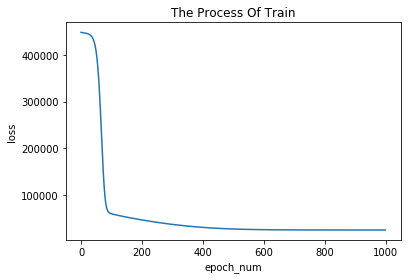

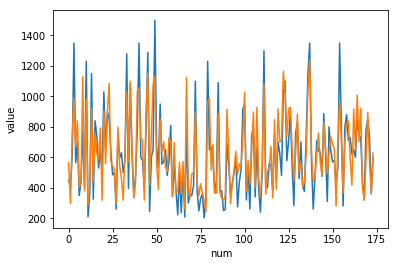

In [30]:
if __name__ == '__main__':
    Train, Test = deal_data()  # 读取训练集和测试集
    np.random.shuffle(Train)  # 随机打乱
    # 训练数据和标签
    x = Train[:, :-1]
    y = Train[:, -1:]
    # 测试数据和标签
    x1 = Test[:, :-1]
    y1 = Test[:, -1:]
    epoch_num = 1000  # 设置迭代次数
    Model = Model_Config(1, 1)
    losses, w1, b1, w0, b0 = Model.train(epoch_num=epoch_num, x=x, y=y, learning_rate=0.0001)
    predicts = np.dot((np.dot(x1, w0) + b0), w1) + b1  # 测试集的预测值
    showpeocess(loss=losses, epoch_num=epoch_num)  # 画出损失函数随迭代次数的变化
    shower(y1, predicts, 174)  # 画出测试集中真实数据和预测数据之间的对比

In [31]:
#Padddle
import paddle.fluid as fluid
import paddle
import numpy as np
import os
import matplotlib.pyplot as plt

In [32]:
BUF_SIZE=500
BATCH_SIZE=5

#用于训练的数据提供器，每次从缓存中随机读取批次大小的数据
train_reader = paddle.batch(
    paddle.reader.shuffle(paddle.dataset.uci_housing.train(), 
                          buf_size=BUF_SIZE),                    
    batch_size=BATCH_SIZE)   
#用于测试的数据提供器，每次从缓存中随机读取批次大小的数据
test_reader = paddle.batch(
    paddle.reader.shuffle(paddle.dataset.uci_housing.test(),
                          buf_size=BUF_SIZE),
    batch_size=BATCH_SIZE)  

/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: 
API "paddle.dataset.uci_housing.train" is deprecated since 2.0.0, and will be removed in future versions. Please use "paddle.text.datasets.UCIHousing" instead.
reason: Please use new dataset API which supports paddle.io.DataLoader 
  
/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: 
API "paddle.dataset.uci_housing.test" is deprecated since 2.0.0, and will be removed in future versions. Please use "paddle.text.datasets.UCIHousing" instead.
reason: Please use new dataset API which supports paddle.io.DataLoader 
  # This is added back by InteractiveShellApp.init_path()


In [33]:
#用于打印，查看uci_housing数据
train_data=paddle.dataset.uci_housing.train();
sampledata=next(train_data())
print(sampledata)

(array([-0.0405441 ,  0.06636364, -0.32356227, -0.06916996, -0.03435197,
        0.05563625, -0.03475696,  0.02682186, -0.37171335, -0.21419304,
       -0.33569506,  0.10143217, -0.21172912]), array([24.]))


/opt/conda/envs/python35-paddle120-env/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
API "paddle.dataset.uci_housing.train" is deprecated since 2.0.0, and will be removed in future versions. Please use "paddle.text.datasets.UCIHousing" instead.
reason: Please use new dataset API which supports paddle.io.DataLoader 
  


In [34]:
#定义张量变量x，表示13维的特征值
x = fluid.layers.data(name='x', shape=[13], dtype='float32')
#定义张量y,表示目标值
y = fluid.layers.data(name='y', shape=[1], dtype='float32')
#定义一个简单的线性网络,连接输入和输出的全连接层
#input:输入tensor;
#size:该层输出单元的数目
#act:激活函数
y_predict=fluid.layers.fc(input=x,size=1,act=None)

AssertionError: In PaddlePaddle 2.x, we turn on dynamic graph mode by default, and 'data()' is only supported in static graph mode. So if you want to use this api, please call 'paddle.enable_static()' before this api to enter static graph mode.

In [ ]:
cost = fluid.layers.square_error_cost(input=y_predict, label=y) #求一个batch的损失值
avg_cost = fluid.layers.mean(cost)                              #对损失值求平均值

In [ ]:
optimizer = fluid.optimizer.SGDOptimizer(learning_rate=0.001)
opts = optimizer.minimize(avg_cost)

In [ ]:
test_program = fluid.default_main_program().clone(for_test=True)

In [ ]:
use_cuda = False                         #use_cuda为False,表示运算场所为CPU;use_cuda为True,表示运算场所为GPU           
place = fluid.CUDAPlace(0) if use_cuda else fluid.CPUPlace()
exe = fluid.Executor(place)              #创建一个Executor实例exe
exe.run(fluid.default_startup_program()) #Executor的run()方法执行startup_program(),进行参数初始化

In [ ]:
# 定义输入数据维度
feeder = fluid.DataFeeder(place=place, feed_list=[x, y])#feed_list:向模型输入的变量表或变量表名

In [ ]:
iter=0;
iters=[]
train_costs=[]

def draw_train_process(iters,train_costs):
    title="training cost"
    plt.title(title, fontsize=24)
    plt.xlabel("iter", fontsize=14)
    plt.ylabel("cost", fontsize=14)
    plt.plot(iters, train_costs,color='red',label='training cost') 
    plt.grid()
    plt.show()

In [ ]:
EPOCH_NUM=50
model_save_dir = "/home/aistudio/work/fit_a_line.inference.model"

for pass_id in range(EPOCH_NUM):                                  #训练EPOCH_NUM轮
    # 开始训练并输出最后一个batch的损失值
    train_cost = 0
    for batch_id, data in enumerate(train_reader()):              #遍历train_reader迭代器
        train_cost = exe.run(program=fluid.default_main_program(),#运行主程序
                             feed=feeder.feed(data),              #喂入一个batch的训练数据，根据feed_list和data提供的信息，将输入数据转成一种特殊的数据结构
                             fetch_list=[avg_cost])    
        if batch_id % 40 == 0:
            print("Pass:%d, Cost:%0.5f" % (pass_id, train_cost[0][0]))    #打印最后一个batch的损失值
        iter=iter+BATCH_SIZE
        iters.append(iter)
        train_costs.append(train_cost[0][0])
       
   
    # 开始测试并输出最后一个batch的损失值
    test_cost = 0
    for batch_id, data in enumerate(test_reader()):               #遍历test_reader迭代器
        test_cost= exe.run(program=test_program, #运行测试cheng
                            feed=feeder.feed(data),               #喂入一个batch的测试数据
                            fetch_list=[avg_cost])                #fetch均方误差
    print('Test:%d, Cost:%0.5f' % (pass_id, test_cost[0][0]))     #打印最后一个batch的损失值
    
    #保存模型
    # 如果保存路径不存在就创建
if not os.path.exists(model_save_dir):
    os.makedirs(model_save_dir)
print ('save models to %s' % (model_save_dir))
#保存训练参数到指定路径中，构建一个专门用预测的program
fluid.io.save_inference_model(model_save_dir,   #保存推理model的路径
                                  ['x'],            #推理（inference）需要 feed 的数据
                                  [y_predict],      #保存推理（inference）结果的 Variables
                                  exe)              #exe 保存 inference model
draw_train_process(iters,train_costs)

In [ ]:
infer_exe = fluid.Executor(place)    #创建推测用的executor
inference_scope = fluid.core.Scope() #Scope指定作用域

In [ ]:
infer_results=[]
groud_truths=[]

#绘制真实值和预测值对比图
def draw_infer_result(groud_truths,infer_results):
    title='Boston'
    plt.title(title, fontsize=24)
    x = np.arange(1,20) 
    y = x
    plt.plot(x, y)
    plt.xlabel('ground truth', fontsize=14)
    plt.ylabel('infer result', fontsize=14)
    plt.scatter(groud_truths, infer_results,color='green',label='training cost') 
    plt.grid()
    plt.show()

In [ ]:
with fluid.scope_guard(inference_scope):#修改全局/默认作用域（scope）, 运行时中的所有变量都将分配给新的scope。
    #从指定目录中加载 推理model(inference model)
    [inference_program,                             #推理的program
     feed_target_names,                             #需要在推理program中提供数据的变量名称
     fetch_targets] = fluid.io.load_inference_model(#fetch_targets: 推断结果
                                    model_save_dir, #model_save_dir:模型训练路径 
                                    infer_exe)      #infer_exe: 预测用executor
    #获取预测数据
    infer_reader = paddle.batch(paddle.dataset.uci_housing.test(),  #获取uci_housing的测试数据
                          batch_size=200)                           #从测试数据中读取一个大小为200的batch数据
    #从test_reader中分割x
    test_data = next(infer_reader())
    test_x = np.array([data[0] for data in test_data]).astype("float32")
    test_y= np.array([data[1] for data in test_data]).astype("float32")
    results = infer_exe.run(inference_program,                              #预测模型
                            feed={feed_target_names[0]: np.array(test_x)},  #喂入要预测的x值
                            fetch_list=fetch_targets)                       #得到推测结果 
                            
    print("infer results: (House Price)")
    for idx, val in enumerate(results[0]):
        print("%d: %.2f" % (idx, val))
        infer_results.append(val)
    print("ground truth:")
    for idx, val in enumerate(test_y):
        print("%d: %.2f" % (idx, val))
        groud_truths.append(val)
    draw_infer_result(groud_truths,infer_results)